In [1]:
!pip install snscrape


In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
query="$TSLA"
tweets=[]
limit=2000


In [4]:
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets)==limit:
        break
    else:
        tweets.append(tweet.content)
        
#create a dataframe with column called tweets
df1=df=pd.DataFrame(tweets,columns=['tweet'])

In [5]:
print(df)

                                                  tweet
0     @djranaluv @TomDuell @SciGuySpace @SpaceX @Tes...
1     @dellcam as an @Audi owner, I'm ok with buying...
2     @WSJ Why does this sound eerily like early sto...
3     T.I real time stock scanning with Gappers, cha...
4     Elon still very much focus at Tesla. \nBullish...
...                                                 ...
1995  @Tesla @elonmusk Fun fact Dodge hasn't made a ...
1996  @Tesla 🔥👉👑Jesus claims to be God, the Father, ...
1997  HS!! Tesla socks are expensive this season. ⁦@...
1998                           @Tesla @elonmusk My idea
1999  @Tesla When Jesus died for your sins He forgav...

[2000 rows x 1 columns]


In [6]:
#function to clean the tweets
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)#remove s@mentions
    text=re.sub(r'#','',text) #removes #
    text=re.sub(r'RT[\s]+','',text) #removes RT
    text=re.sub(r'https?:\/\/\S+','',text) #removes hyperlinks
    return text
#cleaning the text
df['tweet']=df['tweet'].apply(cleanTxt)

In [7]:
df

,tweet
0,Biden has acknowledged Tesla's contribu...
1,"as an owner, I'm ok with buying a instead. ..."
2,Why does this sound eerily like early stories...
3,"T.I real time stock scanning with Gappers, cha..."
4,Elon still very much focus at Tesla. \nBullish...
...,...
1995,Fun fact Dodge hasn't made a touch scene 2009
1996,"🔥👉👑Jesus claims to be God, the Father, and th..."
1997,HS!! Tesla socks are expensive this season. ⁦⁩...
1998,My idea


In [8]:
#function to get subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [9]:
#create two new columns related to subjectivity and polarity
df['Subjectivity']=df['tweet'].apply(getSubjectivity)
df['Polarity']=df['tweet'].apply(getPolarity)

In [10]:
df

,tweet,Subjectivity,Polarity
0,Biden has acknowledged Tesla's contribu...,0.600000,-0.300000
1,"as an owner, I'm ok with buying a instead. ...",0.750000,0.500000
2,Why does this sound eerily like early stories...,0.350000,0.250000
3,"T.I real time stock scanning with Gappers, cha...",0.266667,0.233333
4,Elon still very much focus at Tesla. \nBullish...,0.260000,0.325000
...,...,...,...
1995,Fun fact Dodge hasn't made a touch scene 2009,0.200000,0.300000
1996,"🔥👉👑Jesus claims to be God, the Father, and th...",0.600000,0.700000
1997,HS!! Tesla socks are expensive this season. ⁦⁩...,0.700000,-0.500000
1998,My idea,0.000000,0.000000


In [11]:
#function to compute positive,negative,neutral analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)

In [12]:
df

,tweet,Subjectivity,Polarity,Analysis
0,Biden has acknowledged Tesla's contribu...,0.600000,-0.300000,Negative
1,"as an owner, I'm ok with buying a instead. ...",0.750000,0.500000,Positive
2,Why does this sound eerily like early stories...,0.350000,0.250000,Positive
3,"T.I real time stock scanning with Gappers, cha...",0.266667,0.233333,Positive
4,Elon still very much focus at Tesla. \nBullish...,0.260000,0.325000,Positive
...,...,...,...,...
1995,Fun fact Dodge hasn't made a touch scene 2009,0.200000,0.300000,Positive
1996,"🔥👉👑Jesus claims to be God, the Father, and th...",0.600000,0.700000,Positive
1997,HS!! Tesla socks are expensive this season. ⁦⁩...,0.700000,-0.500000,Negative
1998,My idea,0.000000,0.000000,Neutral


In [13]:
#Print all the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+')'+sortedDF['tweet'][i])
        print()
        j=j+1

1) as an  owner, I'm ok with buying a  instead.  Already secured my place in line for  :)

2) Why does this sound eerily like early stories of  infancy.

3)T.I real time stock scanning with Gappers, charting, relative strength and more.  

StockMarket 
$SPY 
$SPX 
$TSLA 
$AMZN 
$AMC 
$SPX 
$GME 
$NIO 
$AAPL 
$GOOGL 
$NFLX 
$AMD 
$GME 
$BABA 
$BTC 
$ETH 
$PLTR 
$QQQ 
$WMT 
$PYPL 
$SHOP 
Bitcoin 
stocks 

4)Elon still very much focus at Tesla. 
Bullish! $TSLA 

5)Pretty insane to think that  almost went bankrupt in 2008 and 2018 but  and the team never gave up. They were able get through it and now they are the most valuable automaker. 

6)     not good enough. you need to keep apologizing in ever more degrading and performative ways. start by making a video where you cry. five minutes minimum. then make impulsive financial decisions based on your guilt. we won’t be satisfied and neither will you. do it anyway

7)$ETH  TOP analysis price target for next week..🙏 
 $LUNC  $OGN $BTC  $TSLA 

In [14]:
#print the negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+')'+sortedDF['tweet'][i])
        print()
        j=j+1

1)       Biden has acknowledged Tesla's contribution to BEVs. It just didn't get as much press as his stupid statement calling GM the BEV leader. Biden's beef with Musk seems to revolve around unions as the nonsense started before Musk went "Republican".

2)Prediction: within 12 months,  allows brands to sell products directly, skimming a small % on transactions. Customer 1 -  merch. 

3)$TSLA why not do this instead? : 1. Accept BTC as payment 2. Buy $SQ $MARA $BKKT 3. ICO a "Tesla" coin for Tesla Prime membership 4. Buy a Green Home Builder 5. Expand Solar / Energy / Water Worldwide 6.  to replace  7. Launch Knight Rider mode

4)   This is a terrible idea.

You cannot get off planet in one of those, by the way.

5)   Endless time to road trip is very different than peoples 1 week family vacation that is limited by battery range, no thanks

6)   you mean these clowns did not know that Audi is VW and VW is a brand CREATED BY HITLER DURING 1933~1945 IT WAS THEIR MILITARY MFG and Cheap C

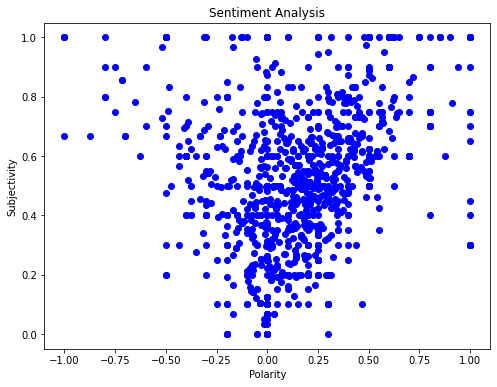

In [15]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [16]:
#Get the percentage of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['tweet']
pos=round((ptweets.shape[0]/df.shape[0]*100),11)
print(pos)


46.05


In [17]:
#Get the percentage of NEGATIVE tweets
ptweets=df[df.Analysis=='Negative']
ptweets=ptweets['tweet']
neg=round((ptweets.shape[0]/df.shape[0]*100),11)
print(neg)

13.7


In [18]:
#Get the percentage of neutral tweets
ptweets=df[df.Analysis=='Neutral']
ptweets=ptweets['tweet']
neu=round((ptweets.shape[0]/df.shape[0]*100),11)
print(neu)

40.25


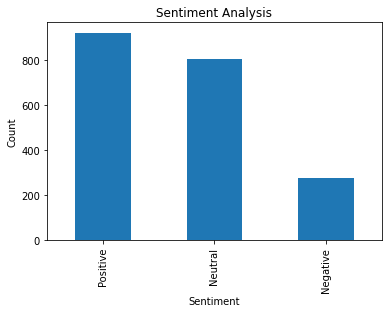

In [19]:
#show the value count
df['Analysis'].value_counts()

#plot and visualize the count
plt.title("Sentiment Analysis")
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [20]:


if(neu<pos or (neu>pos and pos<neg) ):
    print("Dont buy the stock!!")
    print("Here are some negative tweets about the stock that may help you consider not to buy!!")
    j=1
    sortedDF=df.sort_values(by=['Polarity'],ascending=False)
    for i in range(0,sortedDF.shape[0]):
        if (sortedDF['Analysis'][i]=='Negative') and j<=10:
            print(str(j)+')'+df1['tweet'][i])
            j+=1

elif(neu>pos and pos>neg):
    print("Buy the stock!!")
    print("Here are some positive tweets about the stock that may help you  consider buying!!")
    j=1
    sortedDF=df.sort_values(by=['Polarity'])
    
    for i in range(0,sortedDF.shape[0]):
        if (sortedDF['Analysis'][i]=='Positive') and j<=10:
            print(str(j)+')'+df1['tweet'][i])
            j+=1

    
#elif(neu>pos and pos<neg):
    #print("Dont buy the stock!!")

Dont buy the stock!!
Here are some negative tweets about the stock that may help you consider not to buy!!
1)       Biden has acknowledged Tesla's contribution to BEVs. It just didn't get as much press as his stupid statement calling GM the BEV leader. Biden's beef with Musk seems to revolve around unions as the nonsense started before Musk went "Republican".
2)Prediction: within 12 months,  allows brands to sell products directly, skimming a small % on transactions. Customer 1 -  merch. 
3)$TSLA why not do this instead? : 1. Accept BTC as payment 2. Buy $SQ $MARA $BKKT 3. ICO a "Tesla" coin for Tesla Prime membership 4. Buy a Green Home Builder 5. Expand Solar / Energy / Water Worldwide 6.  to replace  7. Launch Knight Rider mode
4)   This is a terrible idea.

You cannot get off planet in one of those, by the way.
5)   Endless time to road trip is very different than peoples 1 week family vacation that is limited by battery range, no thanks
6)   you mean these clowns did not know that